### Finding Subgroups in stock market using the Affinity Propagation model

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import datetime
import json

from sklearn import covariance, cluster
import yfinance as yf

In [2]:
input_file = 'data/company_symbol_mapping.json'

with open(input_file, 'r') as f:
    company_symbols_map = json.loads(f.read())
    
symbols, names = np.array(list(company_symbols_map.items())).T

In [3]:
symbols

array(['MSFT', 'IBM', 'AMZN', 'F', 'NOC', 'BA', 'KO', 'MMM', 'MCD', 'PEP',
       'K', 'PG', 'AAPL'], dtype='<U16')

In [4]:
#Load the historical stock quotes
start_date = datetime.datetime(2019, 1, 1)
end_date = datetime.datetime(2019, 1, 31)

quotes = [yf.Ticker(symbol).history(start = start_date, end = end_date) for symbol in symbols]

In [5]:
np.array([quotes[0].Open]).astype(np.float)

array([[ 97.94682556,  96.26422979,  96.79609971,  96.42863344,
         98.28526294,  99.63905891, 100.43198939,  99.81310986,
         99.78410948,  98.53668161,  99.12655199, 101.78578277,
        101.53435769, 103.91316637, 103.22660832, 102.61739675,
        103.33296743, 103.70042549, 102.752778  , 101.4183294 ,
        101.16691604]])

In [6]:
#Extract opening and closing quotes
opening_quotes = np.array([quote.Open for quote in quotes]).astype(np.float)
closing_quotes = np.array([quote.Close for quote in quotes]).astype(np.float)

#Compute difference between opening and closing quotes
quotes_diff = closing_quotes - opening_quotes 

In [7]:
#Normalize the data
X = quotes_diff.copy().T

X /= X.std(axis = 0)

In [8]:
#Create a graph model
edge_model = covariance.GraphicalLassoCV()

#Train the model
with np.errstate(invalid = 'ignore'):
    edge_model.fit(X)

In [9]:
#Build clustering model using Affinity Propagation model
_, labels = cluster.affinity_propagation(edge_model.covariance_)
num_labels = labels.max()

C:\Users\U\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


In [10]:
print(f'Clustering of stocks based on difference in opening and closing quotes:\n')
for i in range(num_labels + 1):
    print(f"Cluster {i + 1} ==> {', '.join(names[labels == i])}")

Clustering of stocks based on difference in opening and closing quotes:

Cluster 1 ==> Microsoft, Amazon, Apple
Cluster 2 ==> Ford
Cluster 3 ==> IBM, Northrop Grumman, Boeing, 3M
Cluster 4 ==> Mc Donalds
Cluster 5 ==> Coca Cola, Pepsi, Procter Gamble
Cluster 6 ==> Kellogg


### Segmenting the market based on shopping patterns

In [11]:
import csv

from sklearn.cluster import MeanShift, estimate_bandwidth

In [12]:
input_file = 'data/sales.csv'

file_reader = csv.reader(open(input_file, 'r'), delimiter = ',')

X = []
for count, row in enumerate(file_reader):
    if not count:
        names = row[1:]
        continue
        
    X.append([float(x) for x in row[1:]])
    
X = np.array(X)

In [13]:
bandwidth = estimate_bandwidth(X, quantile = 0.8, n_samples = len(X))

#Compute clustering with MeanShift
meanshift_model = MeanShift(bandwidth = bandwidth, bin_seeding = True)
meanshift_model.fit(X)

MeanShift(bandwidth=26006.389359024277, bin_seeding=True)

In [14]:
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))

cluster_centers = meanshift_model.cluster_centers_

In [15]:
print(f'Number of clusters in input data = {num_clusters}')

print('\nCenters of clusters:')
print('\t'.join([name[:3] for name in names]))

for cluster_center in cluster_centers:
    print('\t'.join([str(int(x)) for x in cluster_center]))

Number of clusters in input data = 9

Centers of clusters:
Tsh	Tan	Hal	Tur	Tub	Swe
9823	4637	6539	2607	2228	1239
38589	44199	56158	5030	24674	4125
104972	29186	19415	16016	5060	9372
38741	40539	20120	35059	255	50710
35314	16745	12775	66900	1298	5613
28333	34263	24065	5575	4229	18076
22617	77873	32543	1005	21035	837
14987	46397	97393	1127	37315	3235
7852	4939	63081	134	40066	1332


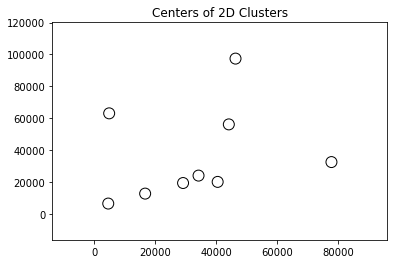

In [16]:
#Extract two features for visualization
cluster_centers_2d = cluster_centers[:, 1:3]

#Plot the cluster centers
plt.figure()
plt.title('Centers of 2D Clusters')

plt.scatter(cluster_centers_2d[:, 0], cluster_centers_2d[:, 1], s = 120, edgecolors = 'black', facecolors = 'none')

offset = 0.25

xmin = cluster_centers_2d[:, 0].min() - offset * cluster_centers_2d[:, 0].ptp()
xmax = cluster_centers_2d[:, 0].max() + offset * cluster_centers_2d[:, 0].ptp()
plt.xlim(xmin, xmax)

ymin = cluster_centers_2d[:, 1].min() - offset * cluster_centers_2d[:, 1].ptp()
ymax = cluster_centers_2d[:, 1].max() + offset * cluster_centers_2d[:, 1].ptp()
plt.ylim(ymin, ymax);

### K-Nearest Neighbours

In [17]:
from sklearn.neighbors import NearestNeighbors

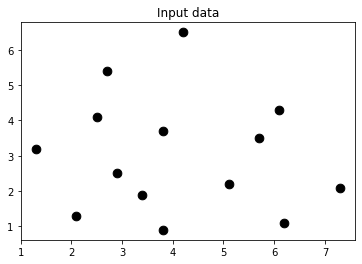

In [18]:
X = np.array([[2.1, 1.3], [1.3, 3.2], [2.9, 2.5], [2.7, 5.4], [3.8, 0.9], [7.3, 2.1], [4.2, 6.5], [3.8, 3.7], 
              [2.5, 4.1], [3.4, 1.9],[5.7, 3.5], [6.1, 4.3], [5.1, 2.2], [6.2, 1.1]])

plt.figure()
plt.title('Input data')
plt.scatter(X[:, 0], X[:, 1], marker = 'o', s = 75, color = 'black');

In [19]:
#Number of nearest neighbors
k = 5

test_data_point = [4.3, 2.7]

#Build K Nearest Neighbors model
knn_model = NearestNeighbors(n_neighbors = k, algorithm = 'ball_tree').fit(X)
distances, indices = knn_model.kneighbors([test_data_point])

In [20]:
print('K Nearest Neighbors')
for rank, index in enumerate(indices[0][:k], start = 1):
    print(f'{str(rank)} ==> {X[index]}')

K Nearest Neighbors
1 ==> [5.1 2.2]
2 ==> [3.8 3.7]
3 ==> [3.4 1.9]
4 ==> [2.9 2.5]
5 ==> [5.7 3.5]


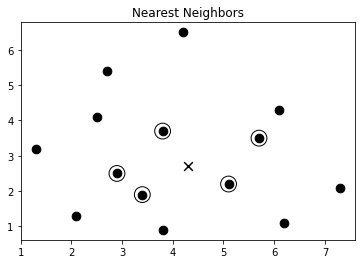

In [21]:
#Visualize the nearest neighbors along with the test datapoint
plt.figure()
plt.title('Nearest Neighbors')

plt.scatter(X[:, 0], X[:, 1], marker = 'o', s = 75, color = 'k')

plt.scatter(X[indices][0][:][:, 0], X[indices][0][:][:, 1], marker = 'o', s = 250, color = 'k', facecolors = 'none')
plt.scatter(test_data_point[0], test_data_point[1], marker = 'x', s = 75, color = 'k');

### Building a K-Nearest Neighbors Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
input_file = 'data/data.txt'

data = np.loadtxt(input_file, delimiter = ',')
X, y = data[:, :-1], data[:, -1].astype(np.int)

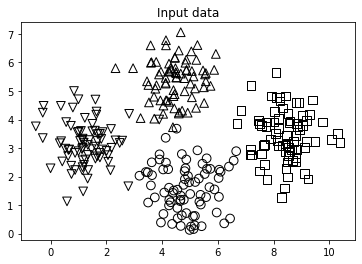

In [24]:
plt.figure()
plt.title('Input data')

marker_shapes = 'v^os'
mapper = [marker_shapes[i] for i in y]

for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker = mapper[i], s = 75, edgecolors = 'black', facecolors = 'none')

In [25]:
num_neighbors = 12

classifier = KNeighborsClassifier(num_neighbors, weights = 'distance')
classifier.fit(X, y)

KNeighborsClassifier(n_neighbors=12, weights='distance')

In [26]:
step_size = 0.01

#Create the mesh to plot the boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

<ipython-input-29-548e6b7ce2b7>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_values, y_values, output, cmap = plt.cm.Paired)


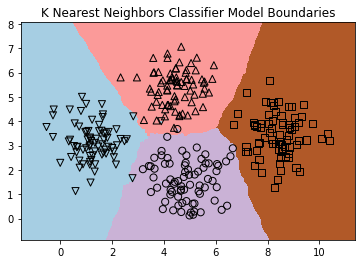

In [29]:
#Visualize the predicted output
output = output.reshape(x_values.shape)

plt.figure()
plt.title('K Nearest Neighbors Classifier Model Boundaries')

plt.pcolormesh(x_values, y_values, output, cmap = plt.cm.Paired)

#Overlay the training points on the map
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker = mapper[i], s = 50, edgecolors = 'black', facecolors = 'none')
    
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max);

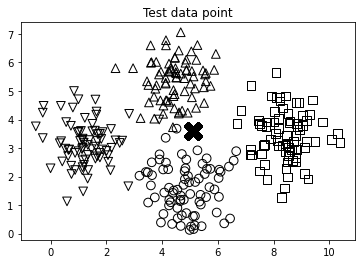

In [30]:
#Test input data point
test_data_point = [5.1, 3.6]

plt.figure()
plt.title('Test data point')

for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker = mapper[i], s = 75, edgecolors = 'black', facecolors = 'none')
    
    plt.scatter(test_data_point[0], test_data_point[1], marker = 'x', linewidth = 6, s = 200, facecolors = 'black')

In [31]:
#Extract the K nearest neighbors
_, indices = classifier.kneighbors([test_data_point])
indices = indices.astype(np.int)[0]

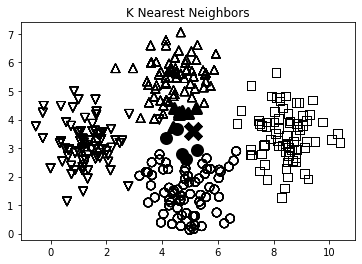

In [33]:
#Plot the k nearest neighbors
plt.figure()
plt.title('K Nearest Neighbors')

for i in indices:
    plt.scatter(X[i, 0], X[i, 1], marker = mapper[y[i]], linewidth = 3, s = 100, facecolors = 'black')
    
    #Overlay the test data point
    plt.scatter(test_data_point[0], test_data_point[1], marker = 'x', linewidth = 6, s = 200, facecolors = 'black')
    
    #Overlay the input data
    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1], marker = mapper[i], s = 75, edgecolors = 'black', facecolors = 'none')

In [34]:
print(f'Predicted Output: {classifier.predict([test_data_point])[0]}')

Predicted Output: 1
